# WeatherPy

Analysis:
1. 
2.
3.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# citipy has found all the city names based on the random coordinates generated below.
#You don't need to find these out - just create a list of cities to loop through to create a dataframe
from citipy import citipy

# Output File (CSV). This is where I will save my results in a nice Excel format (xport df)
output_data_file = "cities1.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# np.random.uniform = Draw samples from a uniform distribution
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# citipy generates this for you - it has been created to find nearest city for lat and long coords. 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to my cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)
# This is a list of cities that I will loop through the API to find out all the weather infomation

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Create a list of city data for DF
city_data = []

# Counters 
record_count = 1
set_count = 1

# Loop through all cities, print log and append to city_data
for city in cities:
    if (record_count >= 50):
        set_count += 1
        record_count = 0
        
    query_url = url + "&q=" + city
    print("Processed " + city + " Count no: " + str(record_count) + " Set No: " + str(set_count))
    record_count += 1
        
    try:
        response = requests.get(query_url).json()
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    
    except:
        print("City does not exist in list")
       # record_count = 0


Processed barrow Count no: 1 Set No: 1
Processed hithadhoo Count no: 2 Set No: 1
Processed vao Count no: 3 Set No: 1
Processed rikitea Count no: 4 Set No: 1
Processed popondetta Count no: 5 Set No: 1
Processed srednekolymsk Count no: 6 Set No: 1
Processed mataura Count no: 7 Set No: 1
Processed busselton Count no: 8 Set No: 1
Processed tasiilaq Count no: 9 Set No: 1
Processed zabolotovka Count no: 10 Set No: 1
Processed saskylakh Count no: 11 Set No: 1
Processed bayir Count no: 12 Set No: 1
Processed samarai Count no: 13 Set No: 1
Processed atuona Count no: 14 Set No: 1
Processed bluff Count no: 15 Set No: 1
Processed khatanga Count no: 16 Set No: 1
Processed sorland Count no: 17 Set No: 1
Processed vientiane Count no: 18 Set No: 1
Processed castro Count no: 19 Set No: 1
Processed denpasar Count no: 20 Set No: 1
Processed punta arenas Count no: 21 Set No: 1
Processed aklavik Count no: 22 Set No: 1
Processed gat Count no: 23 Set No: 1
Processed codrington Count no: 24 Set No: 1
Processe

Processed kaseda Count no: 35 Set No: 4
Processed ketchikan Count no: 36 Set No: 4
Processed ancud Count no: 37 Set No: 4
Processed viedma Count no: 38 Set No: 4
Processed saint-pierre Count no: 39 Set No: 4
Processed touros Count no: 40 Set No: 4
Processed ullal Count no: 41 Set No: 4
Processed narsaq Count no: 42 Set No: 4
Processed ekibastuz Count no: 43 Set No: 4
Processed muros Count no: 44 Set No: 4
Processed leningradskiy Count no: 45 Set No: 4
Processed qaracala Count no: 46 Set No: 4
Processed bedesa Count no: 47 Set No: 4
Processed naryan-mar Count no: 48 Set No: 4
Processed souillac Count no: 49 Set No: 4
Processed kirensk Count no: 0 Set No: 5
Processed fairbanks Count no: 1 Set No: 5
Processed anuradhapura Count no: 2 Set No: 5
Processed chuy Count no: 3 Set No: 5
Processed mercedes Count no: 4 Set No: 5
Processed rungata Count no: 5 Set No: 5
City does not exist in list
Processed san vicente Count no: 6 Set No: 5
Processed kuching Count no: 7 Set No: 5
Processed pisco Cou

Processed mecca Count no: 26 Set No: 8
Processed senanga Count no: 27 Set No: 8
Processed pangody Count no: 28 Set No: 8
Processed pathein Count no: 29 Set No: 8
Processed cherskiy Count no: 30 Set No: 8
Processed norman wells Count no: 31 Set No: 8
Processed kavaratti Count no: 32 Set No: 8
Processed laukaa Count no: 33 Set No: 8
Processed lubao Count no: 34 Set No: 8
Processed inderborskiy Count no: 35 Set No: 8
City does not exist in list
Processed broome Count no: 36 Set No: 8
Processed puri Count no: 37 Set No: 8
Processed bargal Count no: 38 Set No: 8
City does not exist in list
Processed neutraubling Count no: 39 Set No: 8
Processed maceio Count no: 40 Set No: 8
Processed panguna Count no: 41 Set No: 8
Processed xacmaz Count no: 42 Set No: 8
Processed matay Count no: 43 Set No: 8
Processed dalby Count no: 44 Set No: 8
Processed stoyba Count no: 45 Set No: 8
City does not exist in list
Processed falealupo Count no: 46 Set No: 8
City does not exist in list
Processed batagay-alyta 

Processed konstantinovka Count no: 5 Set No: 12
Processed batagay Count no: 6 Set No: 12
Processed himora Count no: 7 Set No: 12
City does not exist in list
Processed borba Count no: 8 Set No: 12
Processed samalaeulu Count no: 9 Set No: 12
City does not exist in list
Processed blue springs Count no: 10 Set No: 12
Processed lalomanu Count no: 11 Set No: 12
City does not exist in list
Processed pitimbu Count no: 12 Set No: 12
Processed pacifica Count no: 13 Set No: 12
Processed egvekinot Count no: 14 Set No: 12
Processed george town Count no: 15 Set No: 12
Processed panacan Count no: 16 Set No: 12
Processed sao filipe Count no: 17 Set No: 12
Processed hvide sande Count no: 18 Set No: 12
Processed suez Count no: 19 Set No: 12
Processed teya Count no: 20 Set No: 12
Processed tocopilla Count no: 21 Set No: 12
Processed bonthe Count no: 22 Set No: 12
Processed la seyne-sur-mer Count no: 23 Set No: 12
Processed marzuq Count no: 24 Set No: 12
Processed perama Count no: 25 Set No: 12
Processed 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a df and show header
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv(output_data_file)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,-5.78,77,0,11.50,US,1649926096
1,hithadhoo,-0.6000,73.0833,83.73,73,100,10.04,MV,1649926096
2,vao,-22.6667,167.4833,77.50,70,57,11.99,NC,1649926096
3,rikitea,-23.1203,-134.9692,78.13,70,4,17.60,PF,1649926096
4,popondetta,-8.7537,148.2534,76.44,90,96,2.77,PG,1649926096


In [6]:
# Show statistical report
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.120975,18.711884,61.987387,69.656987,55.945554,8.563466,1.649926e+09
std,32.508001,90.619224,23.545923,24.249467,39.493990,5.957024,6.269790e+01
min,-54.800000,-179.166700,-18.490000,4.000000,0.000000,0.000000,1.649926e+09
25%,-5.496950,-60.117800,48.205000,58.000000,17.000000,4.070000,1.649926e+09
50%,22.276900,25.570100,65.970000,76.000000,60.000000,7.050000,1.649926e+09
75%,47.249050,100.335400,79.530000,88.000000,99.000000,11.590000,1.649926e+09
max,78.218600,179.316700,107.710000,100.000000,100.000000,40.290000,1.649926e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


The above statistical table shows that there are no cities that have a humidty over 100%. The max humidty level is 100.00

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

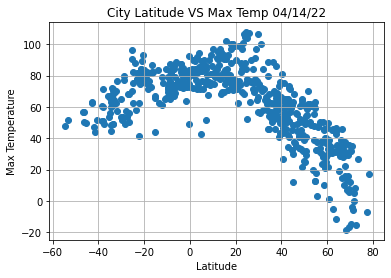

In [7]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude VS Max Temp " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_temp")

The 'City Latitude vs Max Temp' scatter plot shows that the northern hempisphere is colder further away from the equator than the southern hempishere. Overall the temperature in the northern hempishere is lower. For warmer temperature you want to go to a city in the southern hemisphere. 

## Latitude vs. Humidity Plot

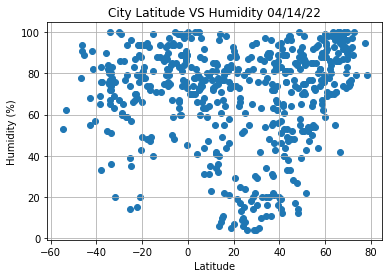

In [8]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude VS Humidity " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_humidity")

The 'City Lat Vs Humidity" plot shows that there are varying levels of humidity across the world. Although the plot does shows that there tends to be higher humdity in the southern hempishre than the northern. The northern hemisphere tends to have a wider variation of humidity levels. 

## Latitude vs. Cloudiness Plot

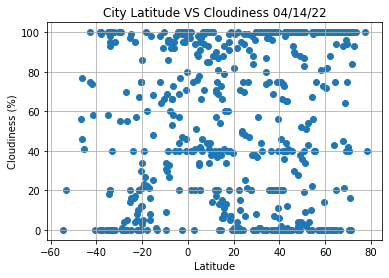

In [9]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude VS Cloudiness " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_cloudiness")

The 'City Lat vs Cloudiness' plot shows that the cities along the equator have the highest percentage of clouds. It also shows that the northern hemisphere has the greatest amount of clouds in general even if it's a small percentage. 

## Latitude vs. Wind Speed Plot

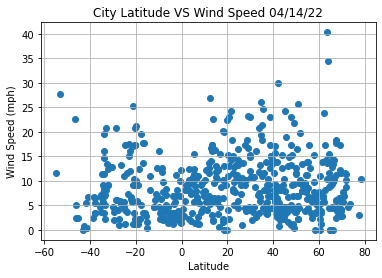

In [10]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude VS Wind Speed " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_wind_speed")

The 'City Lat vs Wind Speed' plot shows that most cities around the world enojoy wind speeds of 20mph or less. The northern hemisphere, however, has greater windspeeds than the southern with a small proportion of cities seeing wind speeds of 20mph to 35 mph. 

## Linear Regression

In [11]:
# Split the dataframe up into Northern and Sothern Hemishpere 
# Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# Southern Hemisphere (less than 0 degrees latitude)

Northern_Hem = city_data_df.loc[city_data_df["Lat"] >= 0]
Southern_Hem = city_data_df.loc[city_data_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.06x + 98.21
The r value is: 0.6993492345117572


Text(0, 0, 'y = -1.06x + 98.21')

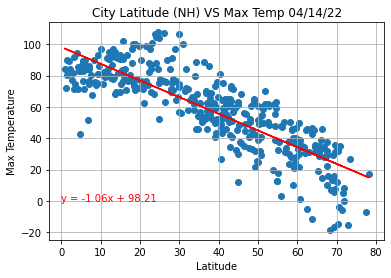

In [12]:
# The plot
x_values = Northern_Hem["Lat"]
y_values = Northern_Hem["Max Temp"]

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude (NH) VS Max Temp " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_temp")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f"The r value is: {rvalue**2}")

# See plot
plt.scatter(x_values, y_values, marker="o", )
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (0,0), color="red")

The 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression' plot above shows that in the northern hempishere the higher the latitude the lower the max tempertare. Ultimately, the further away the city is from the equator the lower the temperature. The closer the city is to the equator the higher the max temp. The r value shows that the data plotted has a negative correlation. As the latitude increases the max temo decreases. The r value is not very strong, however.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.54x + 82.0
The r value is: 0.35473303990235167


Text(-20, 50, 'y = 0.54x + 82.0')

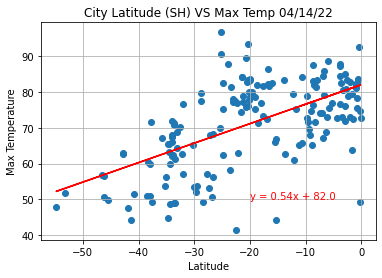

In [13]:
# The plot
x_values = Southern_Hem["Lat"]
y_values = Southern_Hem["Max Temp"]

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude (SH) VS Max Temp " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_temp")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f"The r value is: {rvalue**2}")

# See plot
plt.scatter(x_values, y_values, marker="o", )
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (-20,50), color="red")

The 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression' shows a postive correlation between the city latitude and max temperature. As the city nears the equator the max temperature increases.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.36x + 53.46
The r value is: 0.07750845662108195


Text(60, 20, 'y = 0.36x + 53.46')

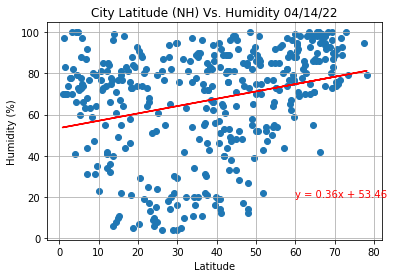

In [15]:
# The plot
x_values = Northern_Hem["Lat"]
y_values = Northern_Hem["Humidity"]

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude (NH) Vs. Humidity " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_temp")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f"The r value is: {rvalue**2}")

# See plot
plt.scatter(x_values, y_values, marker="o", )
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (60,20), color="red")

The 'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression' plot shows that is no linear correlation between latitude and humidity in the northen hemisphere. But the plot suggests that for most cities in the northern hemishere humidity exceeds 40%.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.31x + 82.05
The r value is: 0.05531084738902261


Text(-50, 20, 'y = 0.31x + 82.05')

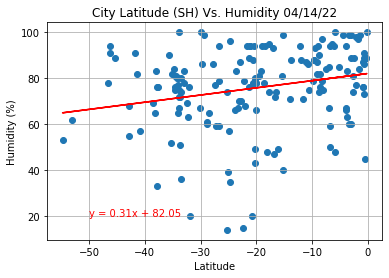

In [18]:
# The plot
x_values = Southern_Hem["Lat"]
y_values = Southern_Hem["Humidity"]

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude (SH) Vs. Humidity " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_temp")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f"The r value is: {rvalue**2}")

# See plot
plt.scatter(x_values, y_values, marker="o", )
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (-50,20), color="red")

The 'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression' plot shows that there is no linear correlation between latitude and humidity in ther Southern hemisphere. Again, the plot does show that for most cities in the southern hemisphere humidity exceeds 40%.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.27x + 47.64
The r value is: 0.019852000084781204


Text(55, 30, 'y = 0.27x + 47.64')

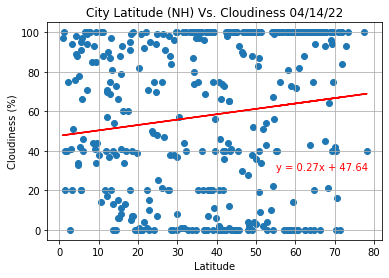

In [21]:
# The plot
x_values = Northern_Hem["Lat"]
y_values = Northern_Hem["Cloudiness"]

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude (NH) Vs. Cloudiness " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_temp")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f"The r value is: {rvalue**2}")

# See plot
plt.scatter(x_values, y_values, marker="o", )
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (55,30), color="red")

The 'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression' plot shows that there is no linear correlation between latitude and cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.79x + 67.28
The r value is: 0.07339414461131358


Text(-50, 20, 'y = 0.79x + 67.28')

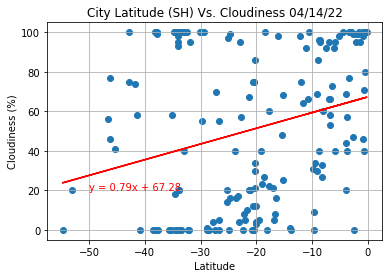

In [22]:
# The plot
x_values = Southern_Hem["Lat"]
y_values = Southern_Hem["Cloudiness"]

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude (SH) Vs. Cloudiness " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_temp")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f"The r value is: {rvalue**2}")

# See plot
plt.scatter(x_values, y_values, marker="o", )
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (-50,20), color="red")

The 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression' plot shows that there is no linear correlation between latitude and cloudiness. But in comparison with the northern hemisphere there tends to be less percentae of clouds overall. It also shows that there are more clouds at varying percentages closer to the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.01x + 9.33
The r value is: 0.00041182763872741024


Text(55, 30, 'y = -0.01x + 9.33')

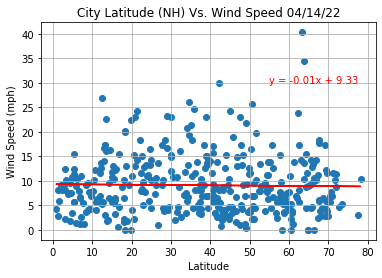

In [23]:
# The plot
x_values = Northern_Hem["Lat"]
y_values = Northern_Hem["Wind Speed"]

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude (NH) Vs. Wind Speed " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_temp")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f"The r value is: {rvalue**2}")

# See plot
plt.scatter(x_values, y_values, marker="o", )
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (55,30), color="red")

The 'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression' plot shows no linear correlation, however, it does that most cities in the norterhn hemisphere do not tend to see wind speeds over 20mph. This does not tend to vary based on latitude - it seems quite uniform.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.1x + 5.33
The r value is: 0.056531690228586284


Text(-50, 20, 'y = -0.1x + 5.33')

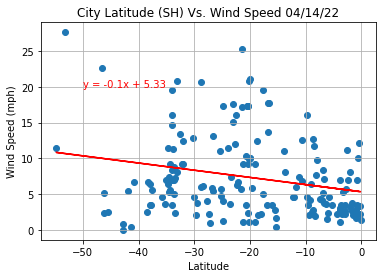

In [24]:
# The plot
x_values = Southern_Hem["Lat"]
y_values = Southern_Hem["Wind Speed"]

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude (SH) Vs. Wind Speed " + time.strftime("%x"))
plt.grid(True)
plt.savefig("lat_temp")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f"The r value is: {rvalue**2}")

# See plot
plt.scatter(x_values, y_values, marker="o", )
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (-50,20), color="red")

The 'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression' plot shows weak linear correlation.